In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
import shutil
import os
import glob
import cv2
from PIL import Image
import torchvision
import torchvision.transforms.functional as fn
from tqdm.notebook import tqdm, trange
import time
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from itertools import cycle
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from matplotlib.colors import Normalize
from sklearn.metrics import ConfusionMatrixDisplay
import torch.optim.lr_scheduler as lr_scheduler
from torch.optim.lr_scheduler import _LRScheduler
from collections import namedtuple
import seaborn as sns

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
}

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
shutil.unpack_archive("/content/drive/MyDrive/Deep Learning/archive.zip", "/content/Datasets/")

In [ ]:
os.mkdir('RESIZED')
os.mkdir('RESIZED/test')
os.mkdir('RESIZED/test/horse_skull')
os.mkdir('RESIZED/test/human_skull')
os.mkdir('RESIZED/test/lion_skull')
os.mkdir('RESIZED/train')
os.mkdir('RESIZED/train/horse_skull')
os.mkdir('RESIZED/train/human_skull')
os.mkdir('RESIZED/train/lion_skull')

In [ ]:
inputfolder='/content/datasets/test/horse_skull'

i=1

for img in glob.glob(inputfolder+ '/*.jpeg'):
   image = cv2.imread(img)
   imgResized = cv2.resize(image, (120, 120))
   cv2.imwrite('/content/RESIZED/test/horse_skull/img%i.jpeg' %i, imgResized)

   i +=1

inputfolder='/content/datasets/test/human_skull'

i=1

for img in glob.glob(inputfolder+ '/*.jpeg'):
   image = cv2.imread(img)
   imgResized = cv2.resize(image, (120, 120))
   cv2.imwrite('/content/RESIZED/test/human_skull/img%i.jpeg' %i, imgResized)

   i +=1

inputfolder='/content/datasets/test/lion_skull'

i=1

for img in glob.glob(inputfolder+ '/*.jpeg'):
   image = cv2.imread(img)
   imgResized = cv2.resize(image, (120, 120))
   cv2.imwrite('/content/RESIZED/test/lion_skull/img%i.jpeg' %i, imgResized)

   i +=1

inputfolder='/content/datasets/train/horse_skull'

i=1

for img in glob.glob(inputfolder+ '/*.jpeg'):
   image = cv2.imread(img)
   imgResized = cv2.resize(image, (120, 120))
   cv2.imwrite('/content/RESIZED/train/horse_skull/img%i.jpeg' %i, imgResized)

   i +=1

inputfolder='/content/datasets/train/human_skull'

i=1

for img in glob.glob(inputfolder+ '/*.jpeg'):
   image = cv2.imread(img)
   imgResized = cv2.resize(image, (120, 120))
   cv2.imwrite('/content/RESIZED/train/human_skull/img%i.jpeg' %i, imgResized)

   i +=1

inputfolder='/content/datasets/train/lion_skull'

i=1

for img in glob.glob(inputfolder+ '/*.jpeg'):
   image = cv2.imread(img)
   imgResized = cv2.resize(image, (120, 120))
   cv2.imwrite('/content/RESIZED/train/lion_skull/img%i.jpeg' %i, imgResized)

   i +=1

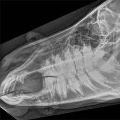

In [ ]:
img = Image.open('/content/RESIZED/train/horse_skull/img1.jpeg')
img

In [ ]:
batch_size = 32
transform_train = torchvision.transforms.Compose([
    # Scale the image up to a square of 40 pixels in both height and width
    torchvision.transforms.Resize(40),
    # Randomly crop a square image of 40 pixels in both height and width to
    # produce a small square of 0.64 to 1 times the area of the original
    # image, and then scale it to a square of 32 pixels in both height and
    # width
    torchvision.transforms.RandomResizedCrop(32, scale=(0.64, 1.0),
                                                   ratio=(1.0, 1.0)),
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.ToTensor(),
    # Standardize each channel of the image
    torchvision.transforms.Normalize([0.4914, 0.4822, 0.4465],
                                     [0.2023, 0.1994, 0.2010])])

transform_test = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize([0.4914, 0.4822, 0.4465],
                                     [0.2023, 0.1994, 0.2010])])

In [ ]:
# Set the data directory
data_dir = '/content/RESIZED/'

# Load the datasets
image_datasets = [torchvision.datasets.ImageFolder(
    os.path.join(data_dir, folder),
    transform=transform_train) for folder in ['train', 'test']]

dataloaders = {
    x: torch.utils.data.DataLoader(
        dataset=image_datasets[x],
        batch_size=32,
        shuffle=True,
        num_workers=4
    )
    for x in range(0,2)
}


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
image_datasets

[Dataset ImageFolder
     Number of datapoints: 617
     Root location: /content/RESIZED/train
     StandardTransform
 Transform: Compose(
                Resize(size=40, interpolation=bilinear, max_size=None, antialias=warn)
                RandomResizedCrop(size=(32, 32), scale=(0.64, 1.0), ratio=(1.0, 1.0), interpolation=bilinear, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
                Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.201])
            ),
 Dataset ImageFolder
     Number of datapoints: 320
     Root location: /content/RESIZED/test
     StandardTransform
 Transform: Compose(
                Resize(size=40, interpolation=bilinear, max_size=None, antialias=warn)
                RandomResizedCrop(size=(32, 32), scale=(0.64, 1.0), ratio=(1.0, 1.0), interpolation=bilinear, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
                Normalize(mean=[0.4914, 0.4822, 0.4465

In [ ]:
dataloaders

{0: <torch.utils.data.dataloader.DataLoader at 0x7fdb0e87fc40>,
 1: <torch.utils.data.dataloader.DataLoader at 0x7fdb0e87d840>}

In [ ]:
num_classes = len(image_datasets[0].classes)
num_classes

3

In [ ]:
means = torch.zeros(3)
stds = torch.zeros(3)

for img, label in image_datasets[0]:
    means += torch.mean(img, dim = (1,2))
    stds += torch.std(img, dim = (1,2))

means /= len(image_datasets[0])
stds /= len(image_datasets[0])

print(f'Calculated means: {means}')
print(f'Calculated stds: {stds}')

Calculated means: tensor([0.4083, 0.2931, 0.2807])
Calculated stds: tensor([1.0038, 1.0222, 1.0145])


In [ ]:
def normalize_image(image):
    image_min = image.min()
    image_max = image.max()
    image.clamp_(min = image_min, max = image_max)
    image.add_(-image_min).div_(image_max - image_min + 1e-5)
    return image

def plot_images(images, labels, classes, normalize = True):

    n_images = len(images)

    rows = int(np.sqrt(n_images))
    cols = int(np.sqrt(n_images))

    fig = plt.figure(figsize = (15, 15))

    for i in range(rows*cols):

        ax = fig.add_subplot(rows, cols, i+1)

        image = images[i]

        if normalize:
            image = normalize_image(image)

        ax.imshow(image.permute(1, 2, 0).cpu().numpy())
        label = classes[labels[i]]
        ax.set_title(label)
        ax.axis('off')

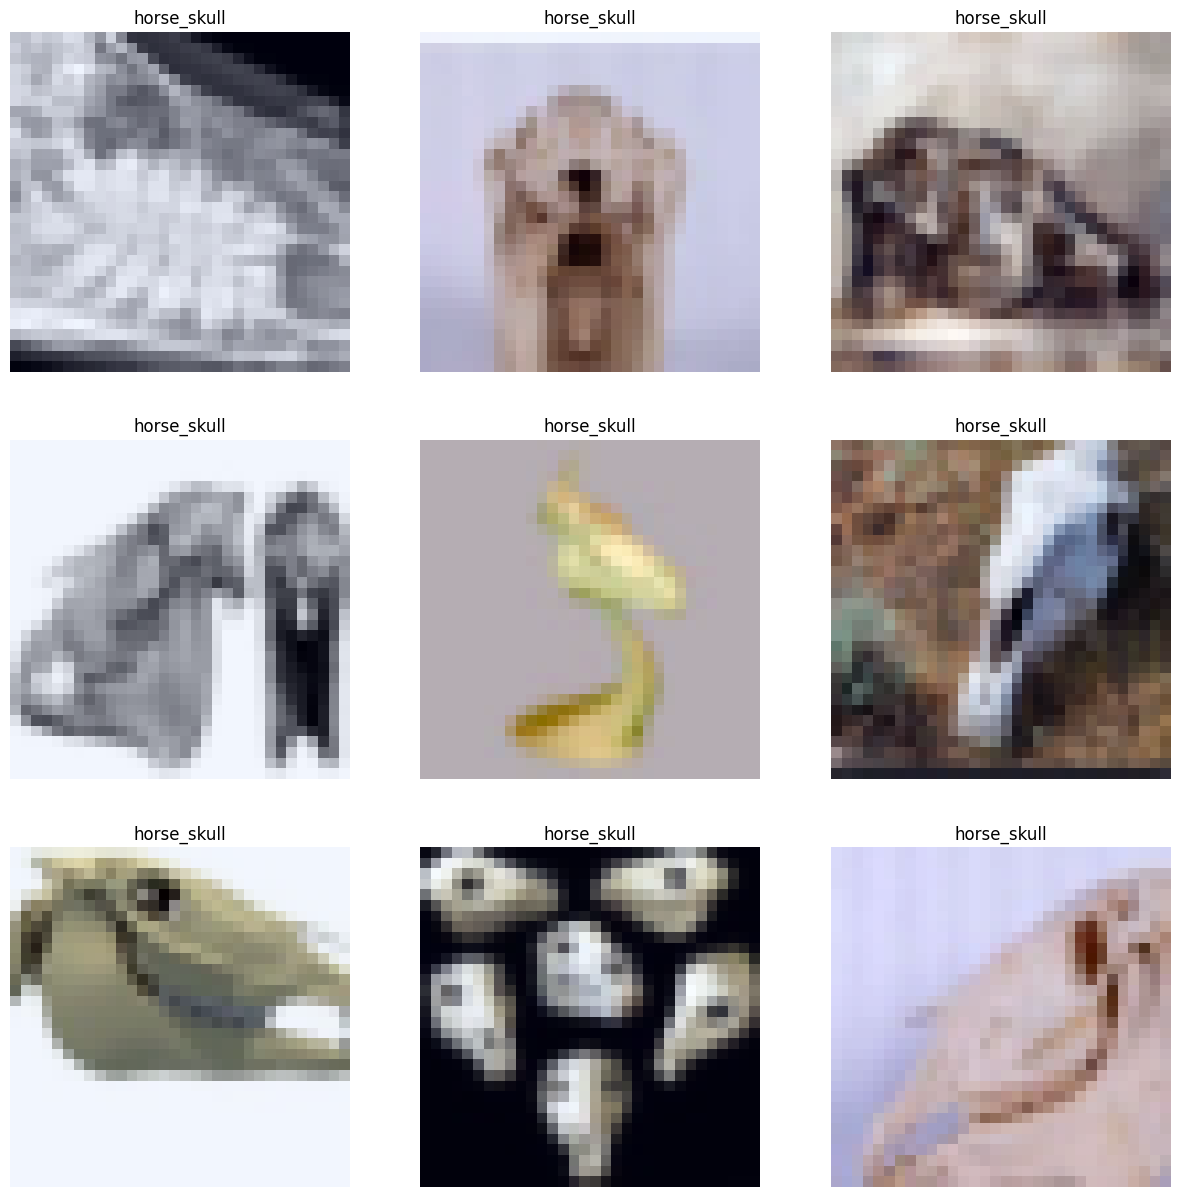

In [ ]:
N_IMAGES = 10

images, labels = zip(*[(image, label) for image, label in
                           [image_datasets[0][i] for i in range(N_IMAGES)]])

classes = image_datasets[0].classes

plot_images(images, labels, classes)

In [ ]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [ ]:
def get_predictions(model, iterator):

    model.eval()

    images = []
    labels = []
    probs = []

    with torch.no_grad():

        for (x, y) in tqdm(iterator):

            x = x.to(device)

            y_pred, _ = model(x)

            y_prob = F.softmax(y_pred, dim=-1)

            images.append(x.cpu())
            labels.append(y.cpu())
            probs.append(y_prob.cpu())

    images = torch.cat(images, dim=0)
    labels = torch.cat(labels, dim=0)
    probs = torch.cat(probs, dim=0)

    return images, labels, probs

# **VGG MODEL**

In [ ]:
class VGG(nn.Module):
    def __init__(self, features, output_dim):
        super().__init__()

        self.features = features

        self.avgpool = nn.AdaptiveAvgPool2d(7)

        self.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(4096, output_dim),
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        h = x.view(x.shape[0], -1)
        x = self.classifier(h)
        return x, h

vgg11_config = [64, 'M', 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M']

vgg13_config = [64, 64, 'M', 128, 128, 'M', 256, 256, 'M', 512, 512, 'M', 512,
                512, 'M']

vgg16_config = [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 'M', 512, 512, 512,
                'M', 512, 512, 512, 'M']

vgg19_config = [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 256, 'M', 512, 512,
                512, 512, 'M', 512, 512, 512, 512, 'M']

def get_vgg_layers(config, batch_norm):

    layers = []
    in_channels = 3

    for c in config:
        assert c == 'M' or isinstance(c, int)
        if c == 'M':
            layers += [nn.MaxPool2d(kernel_size=2)]
        else:
            conv2d = nn.Conv2d(in_channels, c, kernel_size=3, padding=1)
            if batch_norm:
                layers += [conv2d, nn.BatchNorm2d(c), nn.ReLU(inplace=True)]
            else:
                layers += [conv2d, nn.ReLU(inplace=True)]
            in_channels = c

    return nn.Sequential(*layers)

In [ ]:
# vgg11_layers = get_vgg_layers(vgg11_config, batch_norm=True)
# #print(vgg11_layers)

# OUTPUT_DIM = 3

# model = VGG(vgg11_layers, OUTPUT_DIM)
# #print(model)
# pretrained_model = models.vgg11_bn(pretrained=True)
# #print(pretrained_model)
# IN_FEATURES = pretrained_model.classifier[-1].in_features

# final_fc = nn.Linear(IN_FEATURES, OUTPUT_DIM)

In [ ]:
def train(model, iterator, optimizer, criterion, device):

    epoch_loss = 0
    epoch_acc = 0

    model.train()

    for (x, y) in tqdm(iterator, desc="Training", leave=False):

        x = x.to(device)
        y = y.to(device)

        optimizer.zero_grad()

        y_pred, _ = model(x)

        loss = criterion(y_pred, y)

        acc = calculate_accuracy(y_pred, y)

        loss.backward()

        optimizer.step()

        epoch_loss += loss.item()
        epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

def evaluate(model, iterator, criterion, device):

    epoch_loss = 0
    epoch_acc = 0

    model.eval()

    with torch.no_grad():

        for (x, y) in tqdm(iterator, desc="Evaluating", leave=False):

            x = x.to(device)
            y = y.to(device)

            y_pred, _ = model(x)

            loss = criterion(y_pred, y)

            acc = calculate_accuracy(y_pred, y)

            epoch_loss += loss.item()
            epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
# criterion = nn.CrossEntropyLoss()

# model = model.to(device)
# criterion = criterion.to(device)

# FOUND_LR = 5e-4

# params = [
#           {'params': model.features.parameters(), 'lr': FOUND_LR / 10},
#           {'params': model.classifier.parameters()}
#          ]

# optimizer = optim.Adam(params, lr=FOUND_LR)

In [ ]:
def calculate_accuracy(y_pred, y):
    top_pred = y_pred.argmax(1, keepdim=True)
    correct = top_pred.eq(y.view_as(top_pred)).sum()
    acc = correct.float() / y.shape[0]
    return acc

In [ ]:
# EPOCHS = 25

# best_valid_loss = float('inf')
# train_losses = []
# test_losses = []

# for epoch in trange(EPOCHS, desc="Epochs"):

#     start_time = time.monotonic()

#     train_loss, train_acc = train(model, dataloaders[0], optimizer, criterion, device)
#     test_loss, test_acc = evaluate(model, dataloaders[1], criterion, device)

#     train_losses.append(train_loss)
#     test_losses.append(test_loss)

#     if test_loss < best_valid_loss:
#         best_valid_loss = test_loss
#         torch.save(model.state_dict(), 'best_model.pt')

#     end_time = time.monotonic()

#     epoch_mins, epoch_secs = epoch_time(start_time, end_time)

#     print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
#     print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
#     print(f'\t Test. Loss: {test_loss:.3f} |  Test. Acc: {test_acc*100:.2f}%')

## **VGG Evaluation**

In [ ]:
# def count_parameters(model):
#     return sum(p.numel() for p in model.parameters() if p.requires_grad)

# print(f'The model has {count_parameters(model):,} trainable parameters')

In [ ]:
# model.load_state_dict(torch.load('best_model.pt'))

In [ ]:
# test_loss, test_acc = evaluate(model, dataloaders[1], criterion, device)

# print(f'Best Test Loss: {test_loss:.4f} | Best Test Acc: {test_acc:.4f}')

In [ ]:
print(class_names)

[0 1 2]


In [ ]:
# model.load_state_dict(torch.load('best_model.pt'))


In [ ]:
# Use the appropriate device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define your model
OUTPUT_DIM = 3  # have 3 classes: human skulls, horses and lions
vgg11_layers = get_vgg_layers(vgg11_config, batch_norm=True)
model = VGG(vgg11_layers, OUTPUT_DIM)

# Loading pretrained weights
pretrained_model = models.vgg11_bn(pretrained=True)
model.features.load_state_dict(pretrained_model.features.state_dict())

# Move the model to the device
model = model.to(device)

# Set up the loss function and the optimizer
criterion = nn.CrossEntropyLoss().to(device)
optimizer = optim.Adam(model.parameters(), lr=5e-4)  # Adjust the learning rate as necessary

# Initialize lists to keep track of loss and accuracy each epoch
# best_test_loss = float('inf')
train_losses = []
test_losses = []

# Training loop
EPOCHS = 25
for epoch in range(EPOCHS):
    train_loss, train_acc = train(model, dataloaders[0], optimizer, criterion, device)
    test_loss, test_acc = evaluate(model, dataloaders[1], criterion, device)

    # Record the loss and accuracy
    train_losses.append(train_loss)
    test_losses.append(test_loss)

    # Update the best test loss and accuracy
    if test_loss < best_test_loss:
        best_test_loss = test_loss
        best_test_acc = test_acc

    print(f'Epoch: {epoch+1:02}')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Test. Loss: {test_loss:.3f} |  Test. Acc: {test_acc*100:.2f}%')

# Save the model
torch.save(model.state_dict(), 'vgg11_model.pth')


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG11_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG11_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Training:   0%|          | 0/20 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Evaluating:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 01
	Train Loss: 1.025 | Train Acc: 57.55%
	 Test. Loss: 1.565 |  Test. Acc: 70.94%


Training:   0%|          | 0/20 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 02
	Train Loss: 0.577 | Train Acc: 78.51%
	 Test. Loss: 0.709 |  Test. Acc: 77.81%


Training:   0%|          | 0/20 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 03
	Train Loss: 0.451 | Train Acc: 82.71%
	 Test. Loss: 0.712 |  Test. Acc: 80.31%


Training:   0%|          | 0/20 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 04
	Train Loss: 0.431 | Train Acc: 84.05%
	 Test. Loss: 0.493 |  Test. Acc: 82.50%


Training:   0%|          | 0/20 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 05
	Train Loss: 0.380 | Train Acc: 85.85%
	 Test. Loss: 0.516 |  Test. Acc: 82.19%


Training:   0%|          | 0/20 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 06
	Train Loss: 0.304 | Train Acc: 89.43%
	 Test. Loss: 0.887 |  Test. Acc: 78.44%


Training:   0%|          | 0/20 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 07
	Train Loss: 0.417 | Train Acc: 89.53%
	 Test. Loss: 0.863 |  Test. Acc: 76.88%


Training:   0%|          | 0/20 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 08
	Train Loss: 0.248 | Train Acc: 90.85%
	 Test. Loss: 0.755 |  Test. Acc: 81.25%


Training:   0%|          | 0/20 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 09
	Train Loss: 0.552 | Train Acc: 88.47%
	 Test. Loss: 0.545 |  Test. Acc: 79.38%


Training:   0%|          | 0/20 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 10
	Train Loss: 0.525 | Train Acc: 86.06%
	 Test. Loss: 0.731 |  Test. Acc: 76.56%


Training:   0%|          | 0/20 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 11
	Train Loss: 0.458 | Train Acc: 84.58%
	 Test. Loss: 0.925 |  Test. Acc: 74.06%


Training:   0%|          | 0/20 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 12
	Train Loss: 0.393 | Train Acc: 89.44%
	 Test. Loss: 0.454 |  Test. Acc: 81.25%


Training:   0%|          | 0/20 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 13
	Train Loss: 0.379 | Train Acc: 88.33%
	 Test. Loss: 0.520 |  Test. Acc: 83.12%


Training:   0%|          | 0/20 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 14
	Train Loss: 0.291 | Train Acc: 90.94%
	 Test. Loss: 0.682 |  Test. Acc: 75.62%


Training:   0%|          | 0/20 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 15
	Train Loss: 0.315 | Train Acc: 90.23%
	 Test. Loss: 0.844 |  Test. Acc: 77.81%


Training:   0%|          | 0/20 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 16
	Train Loss: 0.229 | Train Acc: 92.57%
	 Test. Loss: 0.529 |  Test. Acc: 83.44%


Training:   0%|          | 0/20 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 17
	Train Loss: 0.213 | Train Acc: 92.88%
	 Test. Loss: 0.863 |  Test. Acc: 84.06%


Training:   0%|          | 0/20 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 18
	Train Loss: 0.295 | Train Acc: 93.51%
	 Test. Loss: 1.091 |  Test. Acc: 76.25%


Training:   0%|          | 0/20 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 19
	Train Loss: 0.363 | Train Acc: 89.60%
	 Test. Loss: 0.463 |  Test. Acc: 82.19%


Training:   0%|          | 0/20 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 20
	Train Loss: 0.290 | Train Acc: 89.53%
	 Test. Loss: 0.432 |  Test. Acc: 83.44%


Training:   0%|          | 0/20 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 21
	Train Loss: 0.185 | Train Acc: 93.51%
	 Test. Loss: 0.553 |  Test. Acc: 84.38%


Training:   0%|          | 0/20 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 22
	Train Loss: 0.094 | Train Acc: 96.94%
	 Test. Loss: 0.652 |  Test. Acc: 82.81%


Training:   0%|          | 0/20 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 23
	Train Loss: 0.291 | Train Acc: 95.36%
	 Test. Loss: 0.541 |  Test. Acc: 85.31%


Training:   0%|          | 0/20 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 24
	Train Loss: 0.364 | Train Acc: 89.13%
	 Test. Loss: 0.878 |  Test. Acc: 76.25%


Training:   0%|          | 0/20 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 25
	Train Loss: 0.286 | Train Acc: 92.57%
	 Test. Loss: 0.480 |  Test. Acc: 84.69%


In [ ]:
print(f'The model has {count_parameters(model):,} trainable parameters')


The model has 128,784,131 trainable parameters


In [ ]:
print(f'Number of epochs: {EPOCHS}')
print(f'Length of train_losses: {len(train_losses)}')
print(f'Length of test_losses: {len(test_losses)}')


Number of epochs: 25
Length of train_losses: 25
Length of test_losses: 25


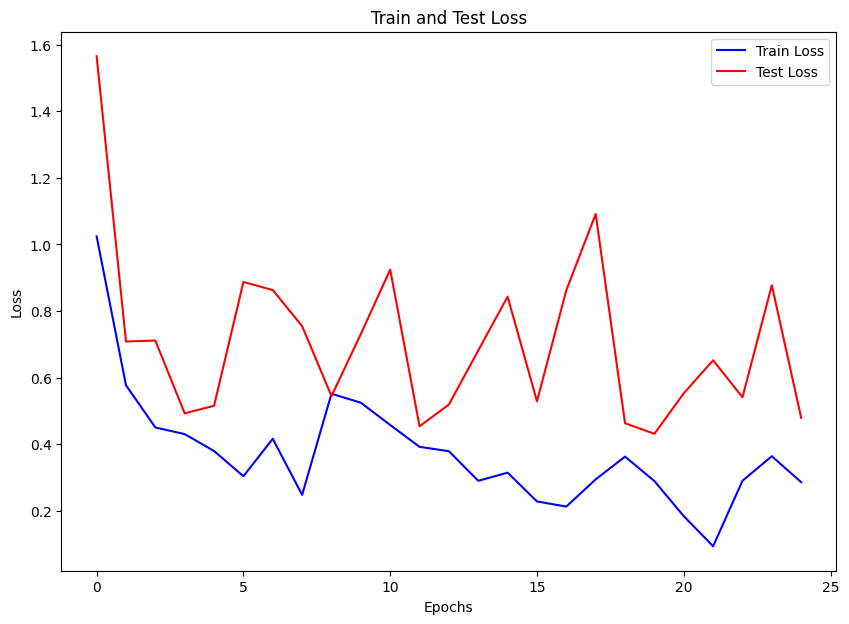

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(range(EPOCHS), train_losses, color='blue', label='Train Loss')
plt.plot(range(EPOCHS), test_losses, color='red', label='Test Loss')
plt.title('Train and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
print(f'Best Test Loss: {best_test_loss:.4f} | Best Test Acc: {best_test_acc:.4f}')

Best Test Loss: 0.4223 | Best Test Acc: 0.8375


In [ ]:
images, labels, probs = get_predictions(model, dataloaders[1])
pred_class = np.argmax(probs, axis=1)
true_class = np.array(labels).flatten()

cm = confusion_matrix(true_class, pred_class)
class_names = np.unique(np.concatenate((true_class, pred_class)))
print(cm)

  0%|          | 0/10 [00:00<?, ?it/s]

[[ 59   3  28]
 [  0 113   7]
 [  6   8  96]]


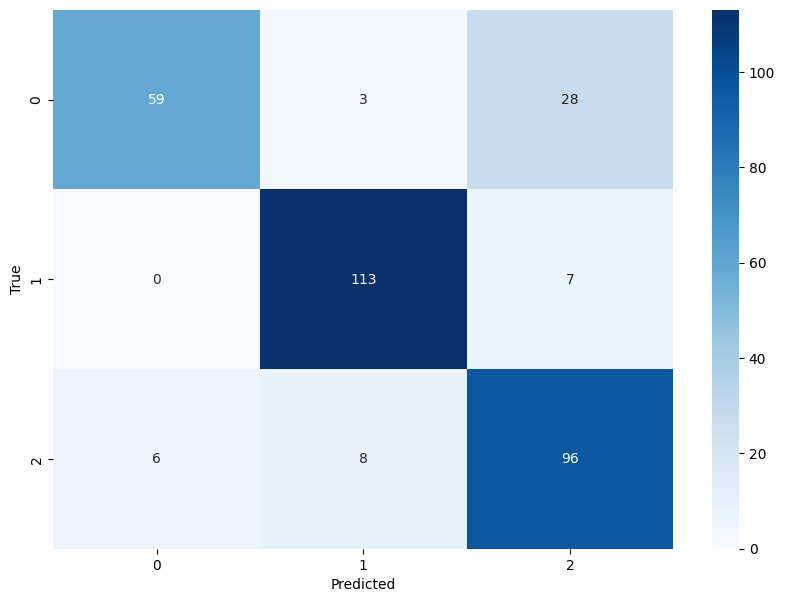

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# assuming you've computed your confusion matrix 'cm' and your class names 'class_names' correctly
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# **LeNet Model**

In [ ]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, kernel_size=5)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(120, 84)
        self.relu4 = nn.ReLU()
        self.fc3 = nn.Linear(84, num_classes)

    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = self.relu3(self.fc1(x))
        x = self.relu4(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# Set hyperparameters
num_epochs = 25
batch_size = 64
learning_rate = 0.001

# Initialize the LeNet model
model = LeNet().to(device)


In [ ]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# for epoch in range(num_epochs):
#     train_loss = 0.0
#     train_correct = 0.0
#     total_samples = 0.0

#     model.train()

#     for images, labels in dataloaders[0]:
#         images = images.to(device)
#         labels = labels.to(device)

#         optimizer.zero_grad()

#         # Forward pass
#         outputs = model(images)
#         loss = criterion(outputs, labels)

#         # Backward pass and optimization
#         loss.backward()
#         optimizer.step()

#         # Calculate training accuracy
#         _, predicted = torch.max(outputs.data, 1)
#         train_correct += (predicted == labels).sum().item()
#         total_samples += labels.size(0)

#         train_loss += loss.item()

#     train_accuracy = 100 * train_correct / total_samples
#     average_train_loss = train_loss / len(dataloaders[0])

#     print(f"Epoch [{epoch + 1}/{num_epochs}], Train Loss: {average_train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%")


In [ ]:
import matplotlib.pyplot as plt

best_test_loss = float('inf')  # Start with a high loss
best_test_accuracy = 0.0  # Start with no accuracy

train_losses = []
test_losses = []

for epoch in range(num_epochs):
    train_loss = 0.0
    train_correct = 0.0
    total_train_samples = 0.0

    model.train()

    for images, labels in dataloaders[0]:  # Assuming dataloaders[0] is the train dataloader
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Calculate training accuracy
        _, predicted = torch.max(outputs.data, 1)
        train_correct += (predicted == labels).sum().item()
        total_train_samples += labels.size(0)

        train_loss += loss.item()

    train_accuracy = 100 * train_correct / total_train_samples
    average_train_loss = train_loss / len(dataloaders[0])
    train_losses.append(average_train_loss)  # Save the average train loss for this epoch

    # Begin testing loop
    model.eval()  # Switch model to evaluation mode

    test_loss = 0.0
    test_correct = 0.0
    total_test_samples = 0.0

    with torch.no_grad():  # No need to calculate gradients when evaluating
        for images, labels in dataloaders[1]:  # Assuming dataloaders[1] is the test dataloader
            images = images.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Calculate testing accuracy
            _, predicted = torch.max(outputs.data, 1)
            test_correct += (predicted == labels).sum().item()
            total_test_samples += labels.size(0)

            test_loss += loss.item()

    test_accuracy = 100 * test_correct / total_test_samples
    average_test_loss = test_loss / len(dataloaders[1])
    test_losses.append(average_test_loss)  # Save the average test loss for this epoch

    print(f"Epoch [{epoch + 1}/{num_epochs}], Train Loss: {average_train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, Test Loss: {average_test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")

    if average_test_loss < best_test_loss:
        best_test_loss = average_test_loss

    if test_accuracy > best_test_accuracy:
        best_test_accuracy = test_accuracy

print(f"Best Test Loss: {best_test_loss:.4f}")
print(f"Best Test Accuracy: {best_test_accuracy:.2f}%")



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch [1/25], Train Loss: 1.0847, Train Accuracy: 37.76%, Test Loss: 1.0789, Test Accuracy: 44.69%
Epoch [2/25], Train Loss: 1.0543, Train Accuracy: 45.54%, Test Loss: 1.0530, Test Accuracy: 46.25%
Epoch [3/25], Train Loss: 1.0213, Train Accuracy: 50.24%, Test Loss: 1.0332, Test Accuracy: 45.31%
Epoch [4/25], Train Loss: 0.9869, Train Accuracy: 52.67%, Test Loss: 1.0383, Test Accuracy: 48.44%
Epoch [5/25], Train Loss: 0.9643, Train Accuracy: 52.51%, Test Loss: 1.0182, Test Accuracy: 47.19%
Epoch [6/25], Train Loss: 0.9662, Train Accuracy: 51.38%, Test Loss: 0.9804, Test Accuracy: 46.56%
Epoch [7/25], Train Loss: 0.9624, Train Accuracy: 51.22%, Test Loss: 0.9824, Test Accuracy: 50.00%
Epoch [8/25], Train Loss: 0.9135, Train Accuracy: 54.13%, Test Loss: 0.9919, Test Accuracy: 50.31%
Epoch [9/25], Train Loss: 0.9157, Train Accuracy: 56.08%, Test Loss: 1.0349, Test Accuracy: 52.81%
Epoch [10/25], Train Loss: 0.8678, Train Accuracy: 59.32%, Test Loss: 0.9989, Test Accuracy: 53.75%
Epoch [11

## **LeNet Evaluation**

In [ ]:
print(f"Best Test Loss: {best_test_loss:.4f}")
print(f"Best Test Accuracy: {best_test_accuracy:.2f}%")

Best Test Loss: 0.8733
Best Test Accuracy: 64.38%


In [ ]:
model.eval()

test_loss = 0.0
test_correct = 0.0
total_samples = 0.0

with torch.no_grad():
    for images , labels in dataloaders[1]:
      images = images.to(device)
      labels = labels.to(device)
      # Forward pass
      outputs = model(images)
      loss = criterion(outputs, labels)

      # Calculate test accuracy
      _, predicted = torch.max(outputs.data, 1)
      test_correct += (predicted == labels).sum().item()
      total_samples += labels.size(0)

      test_loss += loss.item()

test_accuracy = 100 * test_correct / total_samples
average_test_loss = test_loss / len(dataloaders[1])

print(f"Average Test Loss: {average_test_loss:.4f}, Average Test Accuracy: {test_accuracy:.2f}%")


Average Test Loss: 0.9984, Average Test Accuracy: 60.94%


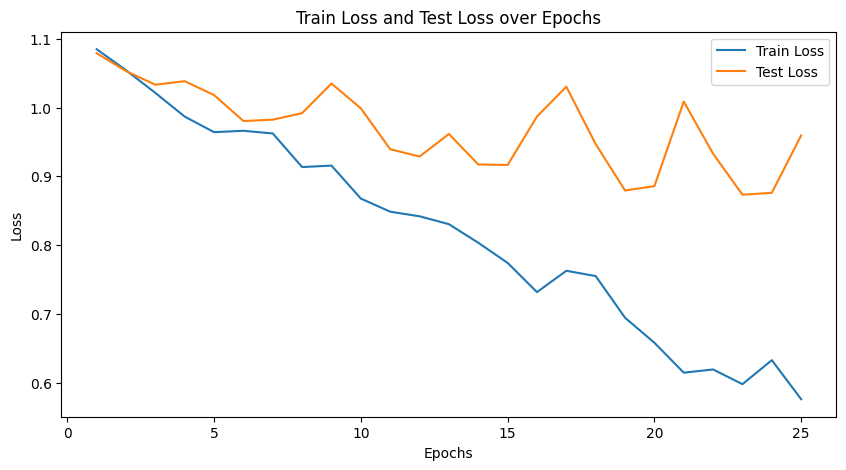

In [ ]:
# Plotting
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train Loss and Test Loss over Epochs')
plt.legend()
plt.show()

In [ ]:
# # Initialize empty lists to store train and test losses
# train_losses = []
# test_losses = []

# # Training loop
# for epoch in range(num_epochs):
#     #train_loss = 0.0
#     #test_loss = 0.0

#     # Rest of the training code

#     # Calculate and store train loss
#     train_loss = train_loss / len(dataloaders[0])
#     train_losses.append(train_loss)

#     # Calculate and store test loss
#     test_loss = test_loss / len(dataloaders[1])
#     test_losses.append(test_loss)

# # Plot train and test loss curves
# plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
# plt.plot(range(1, num_epochs+1), test_losses, label='Test Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.title('Train and Test Loss Curves')
# plt.legend()
# plt.show()


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[73 10  7]
 [24 89  7]
 [42 35 33]]


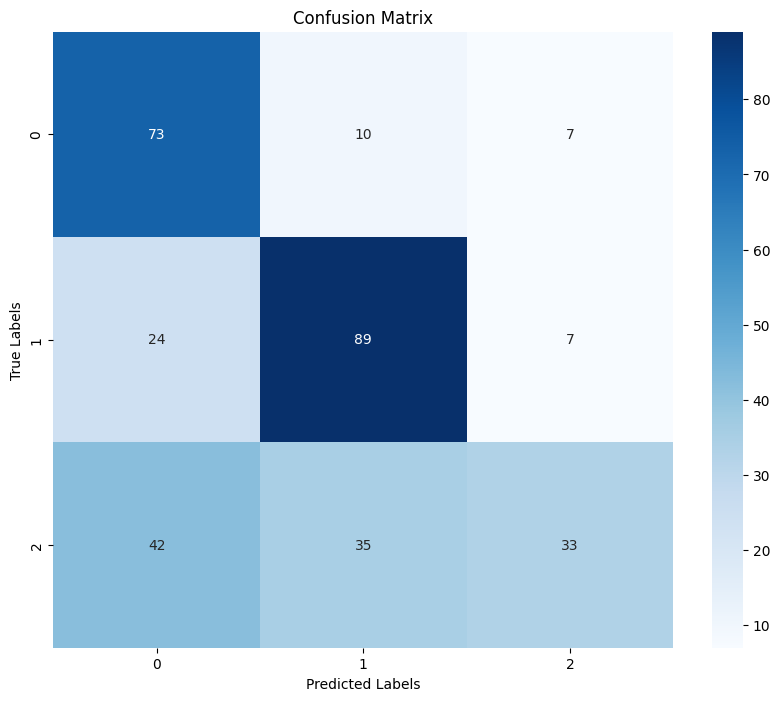

In [ ]:
predictions = []
true_labels = []

with torch.no_grad():
    model.eval()
    for images, labels in dataloaders[1]:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        predictions.extend(predicted.tolist())
        true_labels.extend(labels.tolist())

# Create confusion matrix
cm = confusion_matrix(true_labels, predictions)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
